In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("tableau-colorblind10")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Define the source path (in Google Drive) and destination path
source_path = '/content/drive/MyDrive/self_enrichment/StudentsPerformance.csv'
destination_path = '/content/StudentsPerformance.csv'

# Copy the file
shutil.copy(source_path, destination_path)


'/content/StudentsPerformance.csv'

In [ ]:
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [ ]:
# check for missing data.
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
data.gender.value_counts()

,count
gender,
female,518
male,482


In [ ]:
data['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


In [ ]:
data.rename(columns = {'parental level of education':'parentEducation',
                       'test preparation course':'testCourse',
                       'math score':'mathScore',
                       'reading score':'readingScore',
                       'writing score':'writingScore'}, inplace=True)

In [ ]:
data.head()

,gender,race/ethnicity,parentEducation,lunch,testCourse,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data['score'] = ((data['mathScore']+ data['readingScore'] + data['writingScore'])/ 3).round(2)

In [ ]:
data.head()

,gender,race/ethnicity,parentEducation,lunch,testCourse,mathScore,readingScore,writingScore,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [ ]:
group_data = data.groupby(['lunch']).score.mean()

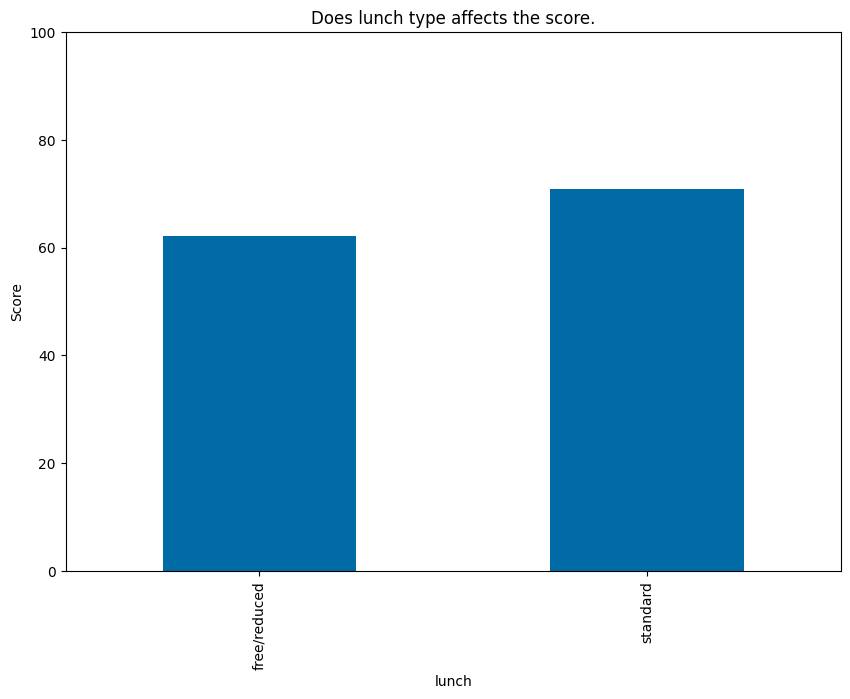

In [ ]:
group_data.plot(kind='bar', figsize=(10, 7))

plt.ylim(0, 100)

plt.xlabel("lunch")
plt.ylabel("Score")
plt.title("Does lunch type affects the score.")

plt.show()

In [ ]:
group_data = data.groupby(['testCourse']).score.mean()
group_data.sort_values(ascending=False, inplace=True)

group_data

,score
testCourse,
completed,72.669469
none,65.038801


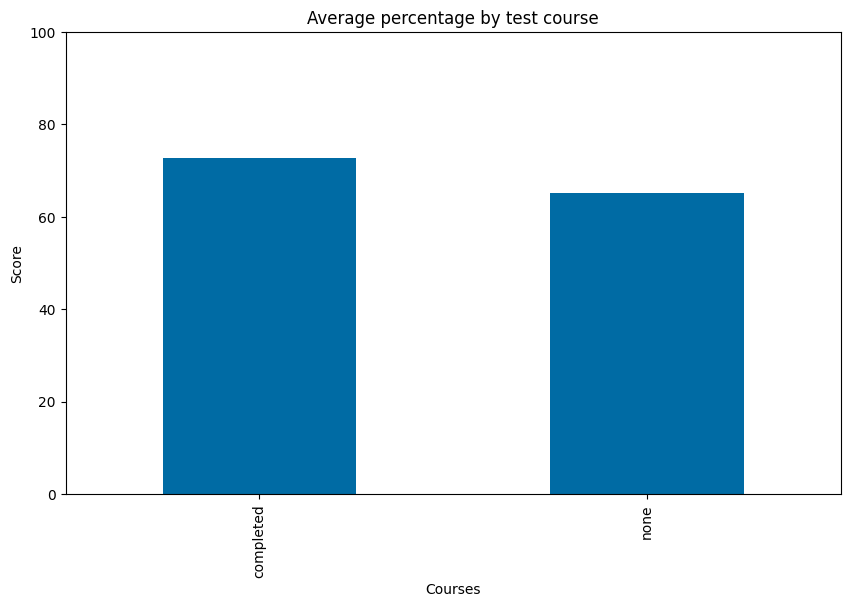

In [ ]:
group_data.plot(kind='bar', figsize=(10, 6))

plt.ylim(0, 100)

plt.xlabel("Courses")
plt.ylabel("Score")
plt.title("Average percentage by test course")

plt.show()

In [ ]:
group_data = data.groupby(['parentEducation', 'testCourse']).score.mean().round()
group_data.sort_values(ascending=False, inplace=True)

In [ ]:
group_data

,,score
parentEducation,testCourse,
bachelor's degree,completed,76.0
master's degree,completed,76.0
associate's degree,completed,75.0
some college,completed,75.0
master's degree,none,72.0
bachelor's degree,none,69.0
some high school,completed,69.0
high school,completed,67.0
associate's degree,none,66.0


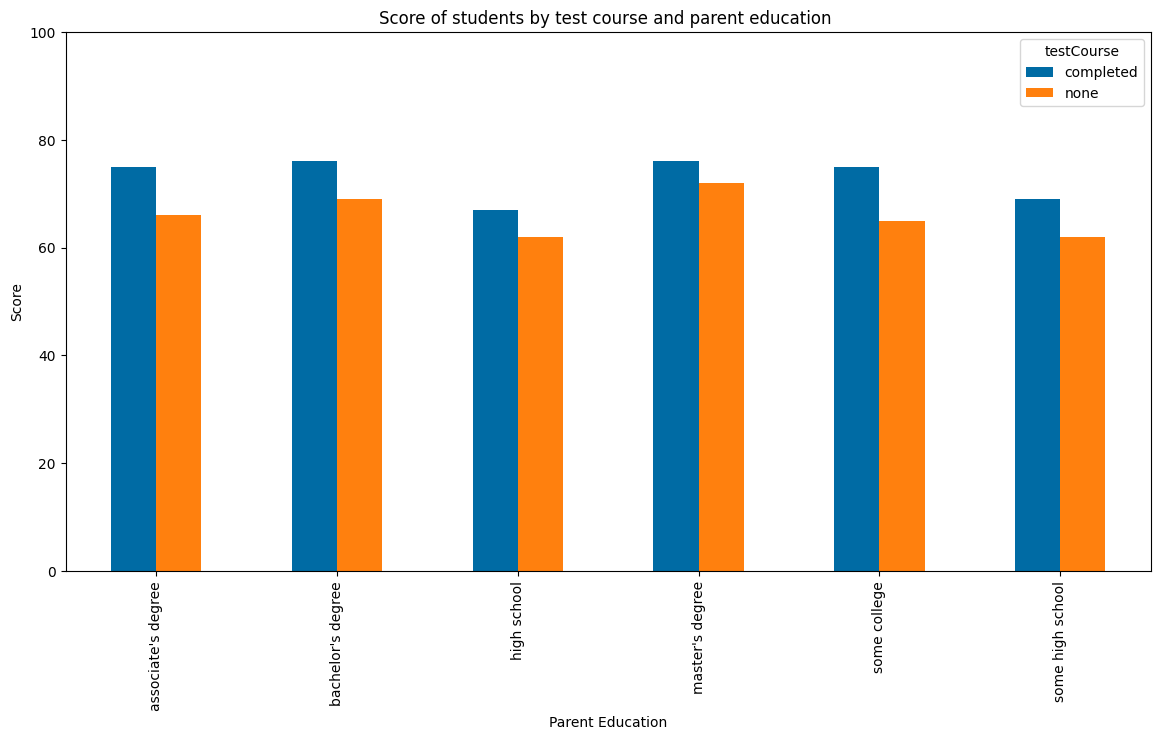

In [ ]:
group_data.unstack().plot(kind='bar', figsize=(14, 7))

plt.ylim(0, 100)
plt.xlabel("Parent Education")
plt.ylabel("Score")
plt.title("Score of students by test course and parent education ")
plt.show()

Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']

# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 36.74


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']

# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 38.36


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV with the pipeline
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.5s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.5s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, reg

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']

# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 54.01


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']


# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 65.06


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']


# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 42.57


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']

# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Linear Regression model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 29.10


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Separate features and target variable
target = 'mathScore'
X = data.drop(columns=['mathScore'])
y = data['mathScore']

# Identify categorical and numeric columns
categorical_features = ['gender', 'race/ethnicity', 'parentEducation', 'lunch', 'testCourse']
numeric_features = ['readingScore', 'writingScore']

# Preprocessing: One-hot encode categorical features, scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model and pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 69.71
